# 5.5.3 [Challenge: What Test to Use](https://courses.thinkful.com/data-201v1/project/5.5.4)


Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the data [file](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv)

Here is the [codebook](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html)

In this dataset, the same participants answered questions in 2012 and again 2014.

1. [Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.](#section1) (ppltrst, cntry, 6=2012, 7=2014, 0-10)
2. [Did people become happier from 2012 to 2014? Compute results for each country in the sample.](#section2) (happy, cntry, 0-10)
3. [Who reported watching more TV in 2012, men or women?](#section3) (gndr (1 male, 2 female), 0-7) 
4. [Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?](#section4) (pplfair, partner (1 yes, 2 no))
5. [Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?](#section5) (sclmeet (1=never, 7=daily))
6. [Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?](#section6)(sclat 1 = much less than most, 5 = much more than most)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

%matplotlib inline

In [38]:
# Import Data
survey = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv'))

# Narrow to the variables needed 
survey = survey[['idno','year', 'gndr', 'cntry', 'partner', 'ppltrst',
                 'happy', 'pplfair', 'tvtot', 'sclmeet', 'sclact']]

# Rename gndr  (1 male, 2 female), partner (1 yes, 2 no to partner 1 yes, 0 no), year (6=2012, 7=2014)
survey['gndr'] = np.where(survey['gndr']==1, 'male', 'female')
survey['partner'] = np.where(survey['partner']==1, 1, 0)
survey['year'] = np.where(survey['year']==6, 'year_2012', 'year_2014')


Some of the coding from the dataset is a tad confusing so I'm going to clean that up:
* gndr (1 male, 2 female) to gndr male, female
* partner (1 yes, 2 no) to partner (1 yes, 0 no)
* year (6=2012, 7=2014) to (2012, 2014)

_____
<a id='section1'></a>

### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
    * First visually check to see if the distribution for ppltrst looks recognizable

In [148]:
# Since this test is the same people in 2012 and 2014 it will help me to organize in a pivot table
df_trust = pd.pivot_table(data=survey,
                          index=['cntry','idno'],
                          values='ppltrst',
                          columns='year').reset_index(drop=False).dropna()

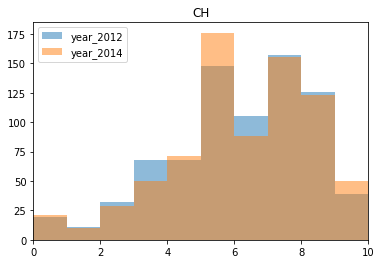

Field: year_2012 
W: 0.952
p-value: 0.000

Field: year_2014 
W: 0.954
p-value: 0.000



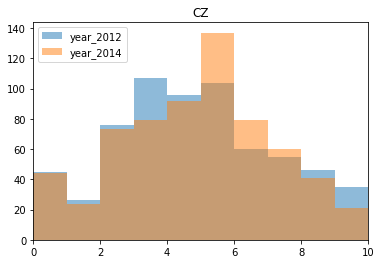

Field: year_2012 
W: 0.967
p-value: 0.000

Field: year_2014 
W: 0.972
p-value: 0.000



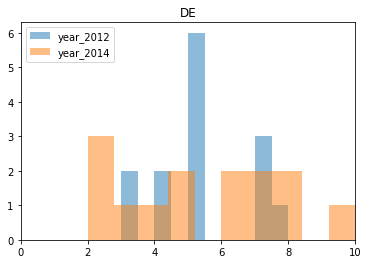

Field: year_2012 
W: 0.901
p-value: 0.118

Field: year_2014 
W: 0.943
p-value: 0.452



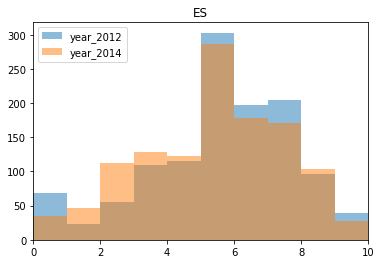

Field: year_2012 
W: 0.950
p-value: 0.000

Field: year_2014 
W: 0.966
p-value: 0.000



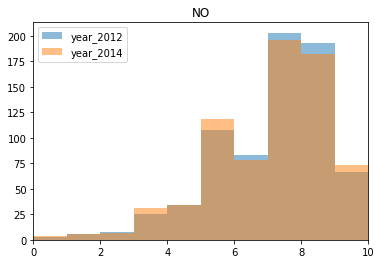

Field: year_2012 
W: 0.922
p-value: 0.000

Field: year_2014 
W: 0.929
p-value: 0.000



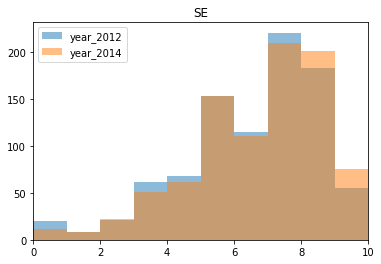

Field: year_2012 
W: 0.936
p-value: 0.000

Field: year_2014 
W: 0.940
p-value: 0.000



In [157]:
# Create a loop that filters year_2012 & year 2014 by country
def plot_hist(x, y, data, country):
    subset = data[data['cntry']==country]
    plt.hist(subset[x], label=x, alpha=0.5, bins=10)
    plt.hist(subset[y], label=y, alpha=0.5, bins=10)
    plt.legend(loc='upper left')
    plt.xlim(0,10)
    plt.title(country)
    plt.show()
    print('Field: %s \nW: %.3f\np-value: %.3f\n'%(x,
          stats.shapiro(subset[x].dropna())[0],
          stats.shapiro(subset[x].dropna())[1]))
    print('Field: %s \nW: %.3f\np-value: %.3f\n'%(y,
          stats.shapiro(subset[y].dropna())[0],
          stats.shapiro(subset[y].dropna())[1]))


for country in df_trust.cntry.unique():
    plot_hist('year_2012', 'year_2014', df_trust, country)

While the p-values aren't great, the W's are all pretty close to 1 regardless of year or country. 
Seems safe to call these normal. This will need to be a dependant test since the same participants are being asked to rate their trust in others each year.

In [154]:
# Create a loop that filters year_2012 & year 2014 by country
def country_ttest_rel(x, y, data, country):
    subset = data[data['cntry']==country]
    x = np.array(subset[x])
    y = np.array(subset[y])
    mean_change = y.mean()-x.mean()
    print('\nCountry: {}'.format(country))
    print(stats.ttest_rel(x, y, nan_policy='omit'))
    print('Mean Change: %.3f'%mean_change)

for country in df_trust.cntry.unique():
    country_ttest_rel('year_2012', 'year_2014', df_trust, country)


Country: CH
Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)
Mean Change: 0.074

Country: CZ
Ttest_relResult(statistic=-0.5001638336887216, pvalue=0.6171292682404208)
Mean Change: 0.068

Country: DE
Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)
Mean Change: 0.143

Country: ES
Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725321856)
Mean Change: -0.217

Country: NO
Ttest_relResult(statistic=0.5073077081124404, pvalue=0.6120925701518767)
Mean Change: -0.048

Country: SE
Ttest_relResult(statistic=-2.0671082026033982, pvalue=0.0390078167095776)
Mean Change: 0.199


Spain and Sweden do have p-values < 0.05. Lets see if this was in increase or decrease.

Looks like happiness in Spain(ES) went down while Sweden (SE) went up.

_____
<a id='section2'></a>

### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
    * happy, cntry, 0-10

The approach for this question will be similar to the last, starting by identifying if the data is normally distributed visually and with the Shapiro-Wilk test.

In [145]:
# Remove happy nulls
df_happy = pd.pivot_table(data=survey,
                          index=['cntry','idno'],
                          values='happy',
                          columns='year').reset_index(drop=False).dropna()

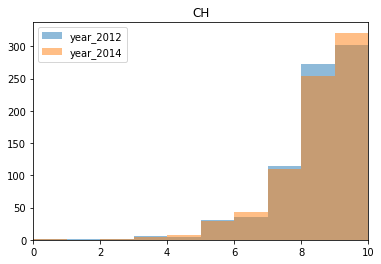

Field: year_2012 
W: 0.879
p-value: 0.000

Field: year_2014 
W: 0.890
p-value: 0.000



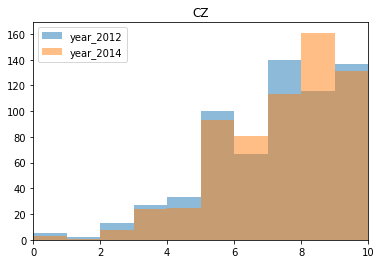

Field: year_2012 
W: 0.949
p-value: 0.000

Field: year_2014 
W: 0.941
p-value: 0.000



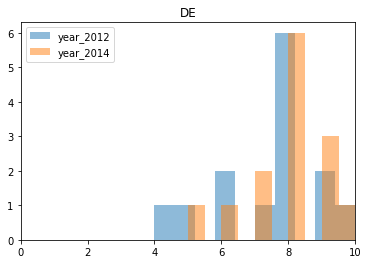

Field: year_2012 
W: 0.917
p-value: 0.199

Field: year_2014 
W: 0.921
p-value: 0.230



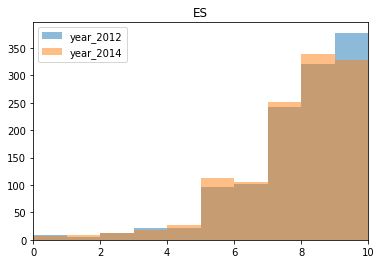

Field: year_2012 
W: 0.903
p-value: 0.000

Field: year_2014 
W: 0.910
p-value: 0.000



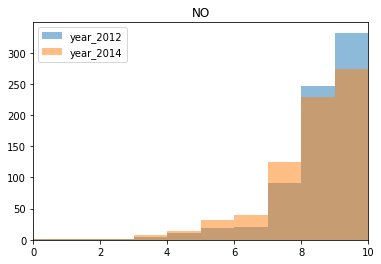

Field: year_2012 
W: 0.851
p-value: 0.000

Field: year_2014 
W: 0.880
p-value: 0.000



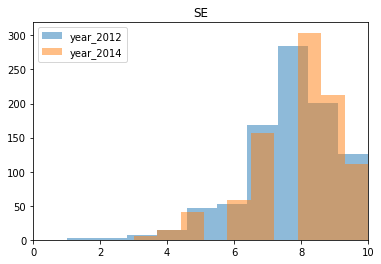

Field: year_2012 
W: 0.904
p-value: 0.000

Field: year_2014 
W: 0.912
p-value: 0.000



In [158]:
# Create a loop that filters year_2012 & year 2014 by country
for country in df_happy.cntry.unique():
    plot_hist('year_2012', 'year_2014', df_happy, country)

In [156]:
for country in df_happy.cntry.unique():
    country_ttest_rel('year_2012', 'year_2014', df_happy, country)


Country: CH
Ttest_relResult(statistic=-0.319412957862232, pvalue=0.7495001355428359)
Mean Change: 0.023

Country: CZ
Ttest_relResult(statistic=-1.4561384833039597, pvalue=0.14584548433894534)
Mean Change: 0.162

Country: DE
Ttest_relResult(statistic=-0.8062257748298549, pvalue=0.4346138707734991)
Mean Change: 0.429

Country: ES
Ttest_relResult(statistic=1.613832417735418, pvalue=0.1068245155648069)
Mean Change: -0.127

Country: NO
Ttest_relResult(statistic=4.2856826576235925, pvalue=2.0674530134057013e-05)
Mean Change: -0.340

Country: SE
Ttest_relResult(statistic=-0.5581637086030012, pvalue=0.5768709591234161)
Mean Change: 0.039


Norway seems to be the only country with a significant change in reported happiness and it unfortunately was a decline.

_____
<a id='section3'></a>

### 3. Who reported watching more TV in 2012, men or women?
 * gndr (1 male, 2 female), tvtot: 0-7

In [162]:
df_tv = survey[survey['year']=='year_2012'][['gndr','tvtot']]

In [163]:
df_tv.gndr.unique()

array(['female', 'male'], dtype=object)

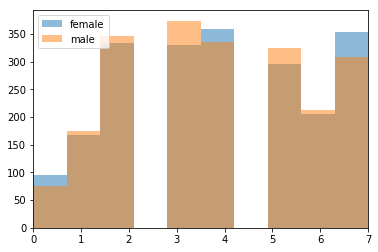

Field: Shapiro female 
W: 0.939
p-value: 0.000

Field: Shapiro male 
W: 0.943
p-value: 0.000

Whitney: 
Stat: 2271081.500
p-value: 0.224

Kruskal: 
Stat: 0.577
p-value: 0.448

Ttest_indResult(statistic=0.6899928109209502, pvalue=0.4902360402696986)


In [177]:
def print_my_stuff(data):
    subset_female = df_tv[df_tv['gndr']=='female']['tvtot'].dropna()
    subset_male = df_tv[df_tv['gndr']=='male']['tvtot'].dropna()
    plt.hist(subset_female, alpha=0.5, label='female')
    plt.hist(subset_male, alpha=0.5, label='male')
    plt.legend(loc='upper left')
    plt.xlim(0,7)
    plt.show()
    print('Field: Shapiro %s \nW: %.3f\np-value: %.3f\n'%('female',
          stats.shapiro(subset_female.dropna())[0],
          stats.shapiro(subset_female.dropna())[1]))
    print('Field: Shapiro %s \nW: %.3f\np-value: %.3f\n'%('male',
          stats.shapiro(subset_male.dropna())[0],
          stats.shapiro(subset_male.dropna())[1]))
    print('Whitney: \nStat: %.3f\np-value: %.3f\n'%(
          stats.mannwhitneyu(subset_female,subset_male)[0],
          stats.mannwhitneyu(subset_female,subset_male)[1]))
    print('Kruskal: \nStat: %.3f\np-value: %.3f\n'%(
          stats.kruskal(subset_female,subset_male, non_policy='omit')[0],
          stats.kruskal(subset_female, subset_male, non_policy='omit')[1]))
    print(stats.ttest_ind(subset_female, subset_male))
    
print_my_stuff(df_tv)

This data seems not normal. In any regard using independant tests for parametric and non-parametric tests teh p-values are not significant

_____
<a id='section4'></a>

### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
* pplfair, partner (1 yes, 2 no)

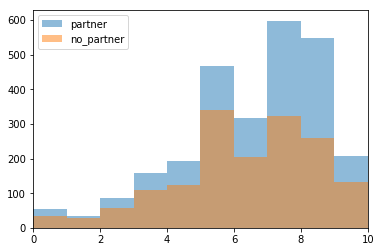

Field: Shapiro Partner 
W: 0.941
p-value: 0.000

Field: Shapiro No Partner 
W: 0.956
p-value: 0.000

Whitney: 
Stat: 2007958.000
p-value: 0.000

Kruskal: 
Stat: 13.339
p-value: 0.000

Ttest_indResult(statistic=3.26130105535529, pvalue=0.0011177228416224864)

Mean Partner: 6.081 
Mean Alone: 5.861 
Difference: 0.220


In [186]:
df_partner = survey[survey['year']=='year_2012'][['partner','pplfair']]

def print_my_stuff(data, field):
    subset_1 = data[data['partner']==1][field].dropna()
    subset_0 = data[data['partner']==0][field].dropna()
    mean_1 = subset_1.mean()
    mean_0 = subset_0.mean()
    plt.hist(subset_1, alpha=0.5, label='partner')
    plt.hist(subset_0, alpha=0.5, label='no_partner')
    plt.legend(loc='upper left')
    plt.xlim(0,10)
    plt.show()
    print('Field: Shapiro %s \nW: %.3f\np-value: %.3f\n'%('Partner',
          stats.shapiro(subset_1.dropna())[0],
          stats.shapiro(subset_1.dropna())[1]))
    print('Field: Shapiro %s \nW: %.3f\np-value: %.3f\n'%('No Partner',
          stats.shapiro(subset_0.dropna())[0],
          stats.shapiro(subset_0.dropna())[1]))
    print('Whitney: \nStat: %.3f\np-value: %.3f\n'%(
          stats.mannwhitneyu(subset_1,subset_0)[0],
          stats.mannwhitneyu(subset_1,subset_0)[1]))
    print('Kruskal: \nStat: %.3f\np-value: %.3f\n'%(
          stats.kruskal(subset_1,subset_0, non_policy='omit')[0],
          stats.kruskal(subset_1, subset_0, non_policy='omit')[1]))
    print(stats.ttest_ind(subset_1, subset_0))
    print('\nMean Partner: %.3f \nMean Alone: %.3f \nDifference: %.3f'%(mean_1, mean_0, (mean_1-mean_0)))
    
print_my_stuff(df_partner, 'pplfair')

Depressingly it looks like people who live alone are less trusting of others...

_____
<a id='section5'></a>

### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
* sclmeet (1=never, 7=daily)

Interesting, here is a question that will require ANOVA since we are testing multiple groups

In [194]:
# Selecting the 3 countries with the largest sample to give me the best chance at accurate results
survey[survey['year']=='year_2014'].groupby(by='cntry')['sclmeet'].count()

cntry
CH     772
CZ     655
DE      14
ES    1211
NO     731
SE     908
Name: sclmeet, dtype: int64

In [219]:
# Going with Spain (ES), Sweden (SE), Switzerland (CH)
subset = survey[(survey['cntry'].isin(['ES','SE', 'CH']))& (survey['year'] == 'year_2014')]
subset = subset.dropna(subset=['sclmeet'])
subset_meet = subset['sclmeet']

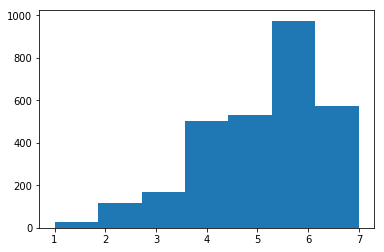

Field: Shapiro
W: 0.894
p-value: 0.000



In [225]:
plt.hist(subset_meet, bins=7)
plt.show()
print('Field: Shapiro\nW: %.3f\np-value: %.3f\n'%(
          stats.shapiro(subset_meet.dropna())[0],
          stats.shapiro(subset_meet.dropna())[1]))


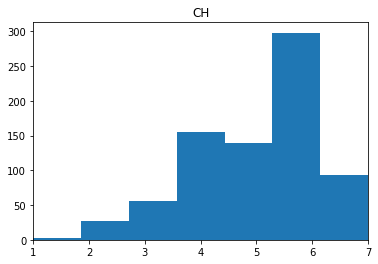

Field: Shapiro CH 
W: 0.897
p-value: 0.000



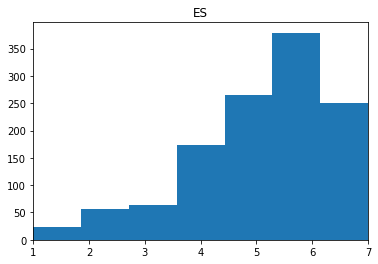

Field: Shapiro ES 
W: 0.888
p-value: 0.000



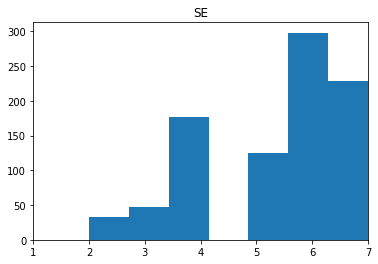

Field: Shapiro SE 
W: 0.880
p-value: 0.000



In [222]:
for country in subset.cntry.unique():
    subset_sclmeet = subset[subset['cntry']==country]['sclmeet'].dropna()
    plt.hist(subset_sclmeet, bins=7)
    plt.title(country)
    plt.xlim(1,7)
    plt.show()
    print('Field: Shapiro %s \nW: %.3f\np-value: %.3f\n'%(country,
          stats.shapiro(subset_sclmeet.dropna())[0],
          stats.shapiro(subset_sclmeet.dropna())[1]))


In [247]:
# Going with Spain (ES), Sweden (SE), Switzerland (CH)
CH = subset[subset['cntry']=='CH']
ES = subset[subset['cntry']=='ES'] 
SE = subset[subset['cntry']=='SE']
CH_meet = CH['sclmeet']
ES_meet = ES['sclmeet']
SE_meet = SE['sclmeet']

In [231]:
stats.f_oneway(CH_meet, ES_meet, SE_meet)

F_onewayResult(statistic=7.8889073426891425, pvalue=0.00038301513884460325)

In [232]:
stats.kruskal(CH_meet, ES_meet, SE_meet)

KruskalResult(statistic=20.974963481937596, pvalue=2.7883324361335602e-05)

In [233]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=subset['sclmeet'],
                          groups=subset['cntry'],
                          alpha = 0.05)

tukey.summary()

group1,group2,meandiff,lower,upper,reject
CH,ES,0.0995,-0.0514,0.2504,False
CH,SE,0.2656,0.1052,0.426,True
ES,SE,0.1661,0.0223,0.3099,True


cntry
CH    5.160622
ES    5.260116
SE    5.426211
Name: sclmeet, dtype: float64


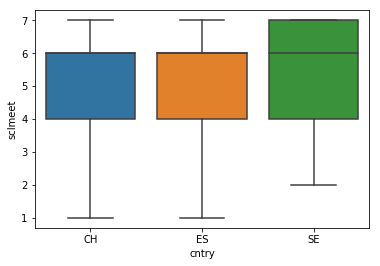

7.8889073426891425
0.00038301513884460325


In [235]:
# Printing the means for each group.
print(subset.groupby(by='cntry').mean()['sclmeet'])

sns.boxplot(y='sclmeet', x='cntry',data=subset)
plt.show()

F, p = stats.f_oneway(CH_meet, SE_meet, ES_meet)

# The F statistic.
print(F)

# The probability. A p < .05 would lead us to believe the group means were
# not all similar in the population.
print(p)

_____
<a id='section6'></a>

### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?
* sclat 1 = much less than most, 5 = much more than most

In [248]:
# 
subset = survey[(survey['cntry'].isin(['ES','SE', 'CH']))& (survey['year'] == 'year_2014')]
subset = subset.dropna(subset=['sclact'])
subset_social = subset['sclact']
CH = subset[subset['cntry']=='CH']
ES = subset[subset['cntry']=='ES'] 
SE = subset[subset['cntry']=='SE']
CH_social = CH['sclact']
ES_social = ES['sclact']
SE_social = SE['sclact']

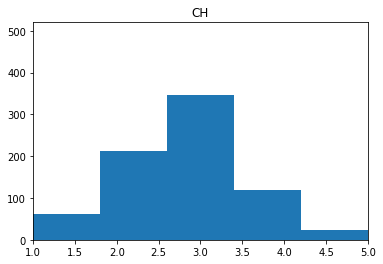

Field: Shapiro CH 
W: 0.893
p-value: 0.000



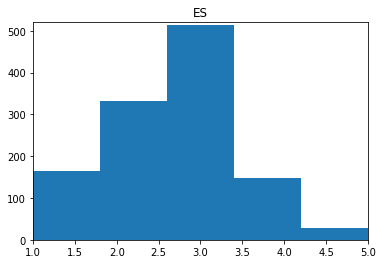

Field: Shapiro ES 
W: 0.892
p-value: 0.000



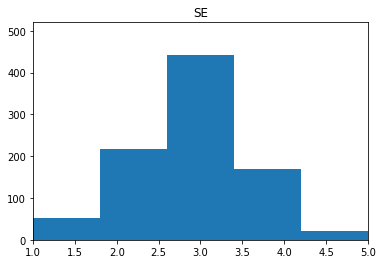

Field: Shapiro SE 
W: 0.882
p-value: 0.000



In [255]:
for country in subset.cntry.unique():
    subset_sclmeet = subset[subset['cntry']==country]['sclact'].dropna()
    plt.hist(subset_sclmeet, bins=5)
    plt.title(country)
    plt.xlim(1,5)
    plt.ylim(0, 520)
    plt.show()
    print('Field: Shapiro %s \nW: %.3f\np-value: %.3f\n'%(country,
          stats.shapiro(subset_sclmeet.dropna())[0],
          stats.shapiro(subset_sclmeet.dropna())[1]))


These all look relatively normal, they also look like they take a similar shape. Lets see if the numbers confirm that social levels are pretty equal.

cntry
CH    2.781699
ES    2.616878
SE    2.879425
Name: sclact, dtype: float64


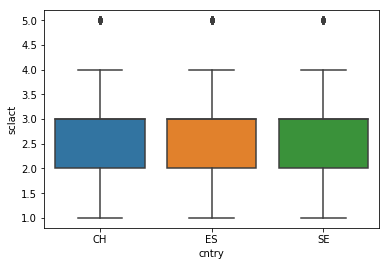

F-stat 22.028167
p-value 0.000000


In [253]:
# Printing the means for each group.
print(subset.groupby(by='cntry').mean()['sclact'])

sns.boxplot(y='sclact', x='cntry',data=subset)
plt.show()

F, p = stats.f_oneway(CH_social, SE_social, ES_social)

# The F statistic.
print('F-stat %5f'%(F))

# The probability. A p < .05 would lead us to believe the group means were
# not all similar in the population.
print('p-value %5f'%(p))

In [254]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=subset['sclact'],
                          groups=subset['cntry'],
                          alpha = 0.05)

tukey.summary()

group1,group2,meandiff,lower,upper,reject
CH,ES,-0.1648,-0.2642,-0.0654,True
CH,SE,0.0977,-0.0076,0.203,False
ES,SE,0.2625,0.1679,0.3572,True


The tukey summary suggests that 